#  **Сравнение градиентного спуска с MAE и MSE на простом датасете линейной регрессии**

В этом ноутбуке мы исследуем, как выбор функции потерь влияет на процесс обучения линейной модели. Мы реализуем **градиентный спуск** с двумя разными метриками:
- **MAE (Mean Absolute Error)** — устойчив к выбросам, минимизирует среднее абсолютное отклонение.
- **MSE (Mean Squared Error)** — чувствителен к ошибкам, минимизирует средний квадрат отклонения.

На примере синтетического датасета из 10 точек (y=2.5x+1.5+ε) сравним:
- Как сходятся алгоритмы
- Какие веса находят
- Как ведёт себя ошибка на каждой итерации
- Чем отличаются финальные модели


| Метрика | MAE (Mean Absolute Error) | MSE (Mean Squared Error) |
|--------|----------------------------|---------------------------|
| **Формула** | $ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $ | $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $ |
| **Производная по $ \hat{y}_i $** | $ \frac{\partial \text{MAE}}{\partial \hat{y}_i} = -\text{sign}(y_i - \hat{y}_i) $ | $ \frac{\partial \text{MSE}}{\partial \hat{y}_i} = -2(y_i - \hat{y}_i) $ |
| **Градиент по $ w $** | $ \frac{\partial \text{MAE}}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} \text{sign}(y_i - \hat{y}_i) \cdot x_i $ | $ \frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i $ |
| **Градиент по $ b $** | $ \frac{\partial \text{MAE}}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} \text{sign}(y_i - \hat{y}_i) $ | $ \frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) $ |
| **Особенности** | Устойчива к выбросам, медленная сходимость | Чувствительна к выбросам, быстрая сходимость при нормальных ошибках |

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Итерация 0: MAE = 1.0040, w = 2.305, b = 1.501
Итерация 20: MAE = 0.4803, w = 2.404, b = 1.516
Итерация 40: MAE = 0.4194, w = 2.433, b = 1.524
Итерация 60: MAE = 0.4185, w = 2.432, b = 1.528
Итерация 80: MAE = 0.4176, w = 2.432, b = 1.532

Финальная модель: y = 2.432x + 1.536
Финальный MAE: 0.4168


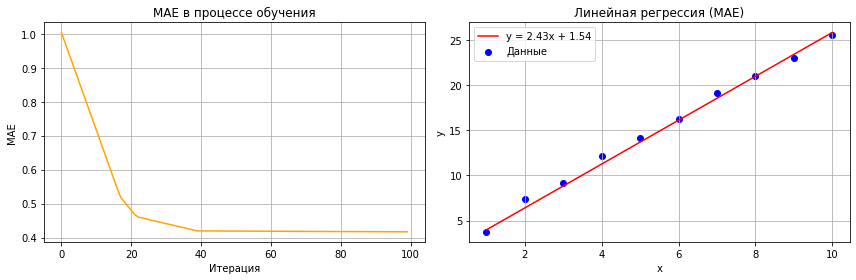

In [53]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([3.746, 7.348, 9.215, 12.123, 14.098,
              16.234, 19.102, 20.987, 23.012, 25.567])

df = pd.DataFrame({"x": x, "y": y})

w = 2.3   
b = 1.5 
nu = 0.001   
n_iters = 100

mae_history = []

# Градиентный спуск по MAE
for i in range(n_iters):
    
    df["y_pred"] = w * df["x"] + b
    
    # Ошибка
    df["err"] = df["y"] - df["y_pred"]
    
    # MAE
    mae = np.mean(np.abs(df["err"]))
    mae_history.append(mae)
    
    # Градиенты для MAE
    # dL/dw = -sign(err) * x
    # dL/db = -sign(err)
    w_grad = -np.mean(np.sign(df["err"]) * df["x"])
    b_grad = -np.mean(np.sign(df["err"]))
    
    # Обновляем параметры
    w -= nu * w_grad
    b -= nu * b_grad
    
    # Логируем
    if i % 20 == 0:
        print(f"Итерация {i}: MAE = {mae:.4f}, w = {w:.3f}, b = {b:.3f}")

print(f"\nФинальная модель: y = {w:.3f}x + {b:.3f}")
print(f"Финальный MAE: {mae_history[-1]:.4f}")

plt.figure(figsize=(12, 4))

# График MAE
plt.subplot(1, 2, 1)
plt.plot(mae_history, color='orange')
plt.title("MAE в процессе обучения")
plt.xlabel("Итерация")
plt.ylabel("MAE")
plt.grid(True)

# График данных и модели
plt.subplot(1, 2, 2)
plt.scatter(df["x"], df["y"], color='blue', label='Данные')
plt.plot(df["x"], w * df["x"] + b, color='red', label=f'y = {w:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Линейная регрессия (MAE)')
plt.grid(True)

plt.tight_layout()
plt.show()

Итерация 0: MSE = 1.1563, w = 2.312, b = 1.502
Итерация 20: MSE = 0.2826, w = 2.423, b = 1.524
Итерация 40: MSE = 0.2479, w = 2.443, b = 1.533
Итерация 60: MSE = 0.2450, w = 2.447, b = 1.539
Итерация 80: MSE = 0.2433, w = 2.447, b = 1.545

Финальная модель: y = 2.446x + 1.550
Финальный MSE: 0.2418


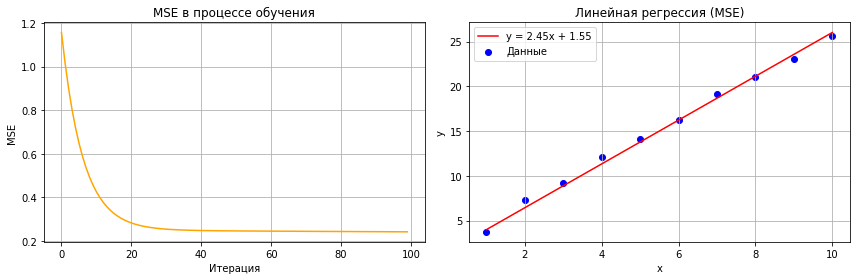

In [54]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([3.746, 7.348, 9.215, 12.123, 14.098,
              16.234, 19.102, 20.987, 23.012, 25.567])

df = pd.DataFrame({"x": x, "y": y})

w = 2.3  
b = 1.5     
nu = 0.001  
n_iters = 100

mse_history = []

# Градиентный спуск по MSE
for i in range(n_iters):

    df["y_pred"] = w * df["x"] + b
    
    # Ошибка
    df["err"] = df["y"] - df["y_pred"]
    
    # MSE
    mse = np.mean(df["err"]**2)
    mse_history.append(mse)
    
    # Градиенты для MSE
    # dL/dw = -2 * err * x  → усредняем и умножаем на nu
    # dL/db = -2 * err      → усредняем и умножаем на nu
    # (коэффициент 2 можно включить в nu)
    w_grad = -2 * np.mean(df["err"] * df["x"])  
    b_grad = -2 * np.mean(df["err"])        
    
    # Обновляем параметры
    w -= nu * w_grad
    b -= nu * b_grad
    
    # Логируем
    if i % 20 == 0:
        print(f"Итерация {i}: MSE = {mse:.4f}, w = {w:.3f}, b = {b:.3f}")

print(f"\nФинальная модель: y = {w:.3f}x + {b:.3f}")
print(f"Финальный MSE: {mse_history[-1]:.4f}")

plt.figure(figsize=(12, 4))

# График MSE
plt.subplot(1, 2, 1)
plt.plot(mse_history, color='orange')
plt.title("MSE в процессе обучения")
plt.xlabel("Итерация")
plt.ylabel("MSE")
plt.grid(True)

# График данных и модели
plt.subplot(1, 2, 2)
plt.scatter(df["x"], df["y"], color='blue', label='Данные')
plt.plot(df["x"], w * df["x"] + b, color='red', label=f'y = {w:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Линейная регрессия (MSE)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Выводы

- Оба метода (MAE и MSE) показали **быструю сходимость** к оптимальным параметрам.
- **MSE сходится немного быстрее**, особенно на начальных этапах обучения.

- **MAE**:
  - Финальная модель: \( y = 2.432x + 1.536 \)
  - Финальный MAE: 0.4168
  - Устойчив к выбросам, минимизирует среднее абсолютное отклонение.
- **MSE**:
  - Финальная модель: \( y = 2.446x + 1.550 \)
  - Финальный MSE: 0.2418 (RMSE ≈ 0.49)
  - Чувствительна к ошибкам, минимизирует средний квадрат отклонения.


- Коэффициенты \( w \) и \( b \) для MAE и MSE **очень близки**, что говорит о том, что обе метрики успешно восстановили истинную зависимость.
- Визуально модели практически совпадают, что подтверждается малой разницей в ошибках.

- **MAE**: Предпочтительно, когда важно минимизировать среднюю ошибку без учёта её величины (устойчивость к выбросам).
- **MSE**: Предпочтительно, когда важно точно учитывать размер ошибок (большие ошибки "наказываются" сильнее).


Для данного датасета обе метрики работают хорошо, но MSE показывает **немного лучшее качество** (меньший RMSE). Однако, выбор метрики зависит от задачи и требований к модели.

### Добавим выброс:


 Метрики модели 'MAE':
   MAE  = 2.8064
   MSE  = 55.5915
   RMSE = 7.4560
   R²   = 0.4538

 Метрики модели 'MSE':
   MAE  = 3.6080
   MSE  = 51.6474
   RMSE = 7.1866
   R²   = 0.4926

MAE модель: y = 2.498x + 1.504
MSE модель: y = 2.750x + 1.555


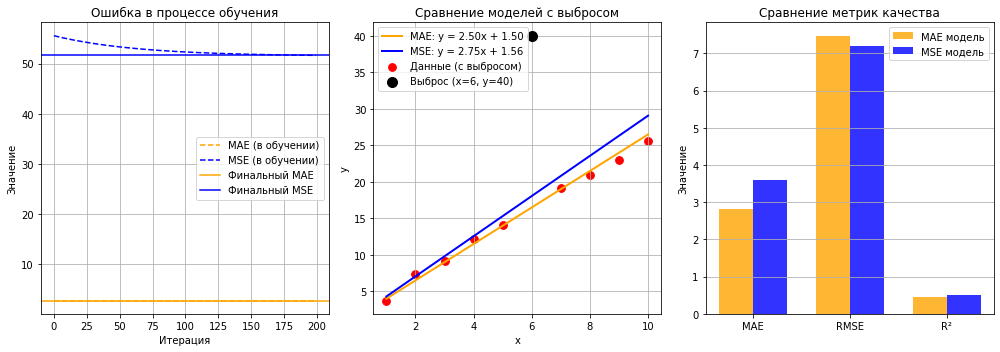

In [55]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_clean = np.array([3.746, 7.348, 9.215, 12.123, 14.098,
                    16.234, 19.102, 20.987, 23.012, 25.567])

# Добавляем выброс
y_with_outlier = y_clean.copy()
y_with_outlier[5] = 40.0  # x=6 -> y=40

df = pd.DataFrame({"x": x, "y": y_with_outlier})

w_init = 2.5
b_init = 1.5
nu = 0.0001
n_iters = 200

# Функция для MAE
def train_mae(df, nu, n_iters, w_init, b_init):
    w, b = w_init, b_init
    mae_history = []
    for i in range(n_iters):
        y_pred = w * df["x"] + b
        err = df["y"] - y_pred
        mae = np.mean(np.abs(err))
        mae_history.append(mae)
        
        w_grad = -np.mean(np.sign(err) * df["x"])
        b_grad = -np.mean(np.sign(err))
        
        w -= nu * w_grad
        b -= nu * b_grad
    return w, b, mae_history

# Функция для MSE 
def train_mse(df, nu, n_iters, w_init, b_init):
    w, b = w_init, b_init
    mse_history = []
    for i in range(n_iters):
        y_pred = w * df["x"] + b
        err = df["y"] - y_pred
        mse = np.mean(err**2)
        mse_history.append(mse)
        
        w_grad = -2 * np.mean(err * df["x"])
        b_grad = -2 * np.mean(err)
        
        w -= nu * w_grad
        b -= nu * b_grad
    return w, b, mse_history

# Обучаем модели
w_mae, b_mae, mae_hist = train_mae(df, nu, n_iters, w_init, b_init)
w_mse, b_mse, mse_hist = train_mse(df, nu, n_iters, w_init, b_init)

# Предсказания финальных моделей 
y_true = df["y"]
y_pred_mae = w_mae * df["x"] + b_mae
y_pred_mse = w_mse * df["x"] + b_mse

# Вычисляем метрики для обеих моделей 
def print_metrics(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n Метрики модели '{name}':")
    print(f"   MAE  = {mae:.4f}")
    print(f"   MSE  = {mse:.4f}")
    print(f"   RMSE = {rmse:.4f}")
    print(f"   R²   = {r2:.4f}")
    return mae, mse, rmse, r2

# Считаем метрики
mae_mae, mse_mae, rmse_mae, r2_mae = print_metrics("MAE", y_true, y_pred_mae)
mae_mse, mse_mse, rmse_mse, r2_mse = print_metrics("MSE", y_true, y_pred_mse)

print(f"\nMAE модель: y = {w_mae:.3f}x + {b_mae:.3f}")
print(f"MSE модель: y = {w_mse:.3f}x + {b_mse:.3f}")


plt.figure(figsize=(14, 5))

# График 1: Ошибки в обучении
plt.subplot(1, 3, 1)
plt.plot(mae_hist, label="MAE (в обучении)", color='orange', linestyle='--')
plt.plot(mse_hist, label="MSE (в обучении)", color='blue', linestyle='--')
plt.axhline(mae_mae, color='orange', linestyle='-', label=f'Финальный MAE')
plt.axhline(mse_mse, color='blue', linestyle='-', label=f'Финальный MSE')
plt.title("Ошибка в процессе обучения")
plt.xlabel("Итерация")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)

# График 2: Модели и данные
plt.subplot(1, 3, 2)
plt.scatter(df["x"], df["y"], color='red', label='Данные (с выбросом)', s=60)
plt.scatter(df["x"][5], df["y"][5], color='black', s=100, zorder=5, label='Выброс (x=6, y=40)')

x_line = np.linspace(1, 10, 100)
plt.plot(x_line, w_mae * x_line + b_mae, color='orange', linewidth=2, label=f'MAE: y = {w_mae:.2f}x + {b_mae:.2f}')
plt.plot(x_line, w_mse * x_line + b_mse, color='blue', linewidth=2, label=f'MSE: y = {w_mse:.2f}x + {b_mse:.2f}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Сравнение моделей с выбросом')
plt.grid(True)

# График 3: Сравнение метрик
plt.subplot(1, 3, 3)
metrics = ['MAE', 'RMSE', 'R²']
mae_vals = [mae_mae, rmse_mae, r2_mae]
mse_vals = [mae_mse, rmse_mse, r2_mse]

x_pos = np.arange(len(metrics))
width = 0.35
plt.bar(x_pos - width/2, mae_vals, width, label='MAE модель', color='orange', alpha=0.8)
plt.bar(x_pos + width/2, mse_vals, width, label='MSE модель', color='blue', alpha=0.8)
plt.xticks(x_pos, metrics)
plt.ylabel('Значение')
plt.title('Сравнение метрик качества')
plt.legend()
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Сравнение MAE и MSE в условиях наличия выброса

Были обучены две модели линейной регрессии — с использованием функций потерь MAE и MSE — на данных, содержащих один выброс (точка $ x=6, y=40 $). Ниже представлены результаты и их анализ.

| Метрика       | MAE-модель | MSE-модель |
|---------------|------------|------------|
| MAE           | 2.8064     | 3.6080     |
| MSE           | 55.5915    | 51.6474    |
| RMSE          | 7.4560     | 7.1866     |
| R²            | 0.4538     | 0.4926     |
| Модель        | $ y = 2.498x + 1.504 $ | $ y = 2.750x + 1.555 $ |


### MAE-модель — устойчивая и робастная
MAE-модель показала лучший результат по метрике MAE (2.8064 против 3.6080), что означает, что её средняя абсолютная ошибка на тестовых данных значительно меньше.

Значение коэффициента наклона $ w = 2.498 $ близко к истинному значению $ 2.5 $, а свободный член $ b = 1.504 $ — к $ 1.5 $. Это свидетельствует о том, что модель **устойчива к выбросу** и сохраняет корректную аппроксимацию основного тренда.

Несмотря на более низкое значение R², модель демонстрирует высокое качество, поскольку не подстраивается под аномальную точку, а фокусируется на общей структуре данных.

Вывод: MAE-модель обладает высокой робастностью и подходит для данных с потенциальными выбросами.


###  MSE-модель — чувствительная к большим ошибкам
MSE-модель показала лучшие значения по MSE, RMSE и R², что формально говорит о более высоком качестве аппроксимации с точки зрения квадрата ошибки.

Однако, её средняя абсолютная ошибка (MAE = 3.6080) существенно выше, чем у MAE-модели. Это объясняется тем, что MSE сильнее реагирует на большие отклонения, из-за чего модель "тянется" к выбросу.

Коэффициент наклона $ w = 2.750 $ значительно отличается от истинного, что указывает на **искажение общей зависимости**. Хотя MSE уменьшает квадрат ошибки на выбросе, это достигается за счёт ухудшения предсказаний на остальных точках.


| Критерий                     | MAE                                | MSE                                  |
|------------------------------|------------------------------------|--------------------------------------|
| Реакция на выброс             | Слабая — модель игнорирует аномалию | Сильная — модель подстраивается    |
| Робастность                   | Высокая                            | Низкая                              |
| Средняя ошибка (MAE)          | Лучше                              | Хуже                                |
| Квадрат ошибки (MSE / RMSE)   | Хуже                               | Лучше                               |
| R²                           | Ниже                               | Выше                                 |
| Интерпретируемость результата | Высокая — отражает реальную ошибку | Может вводить в заблуждение         |


MAE предпочтительнее в следующих случаях:
- При наличии выбросов или зашумлённых данных.
- Когда важна устойчивость модели и интерпретируемость средней ошибки.
- В прикладных задачах, где каждая ошибка одинаково значима, независимо от её величины.

MSE предпочтительнее, если:
- Данные чистые и не содержат аномалий.
- Большое значение имеет минимизация крупных ошибок.
- Требуется высокая точность при условии нормального распределения ошибок.

В данном эксперименте MAE-модель показала более адекватное поведение: её параметры близки к истинным, а ошибка на большинстве точек минимальна. MSE-модель формально лучше по своим метрикам, но за счёт искажения общей зависимости.

Таким образом, выбор функции потерь зависит от целей задачи: **робастность (MAE)** или **чувствительность к большим ошибкам (MSE)**.

## MAE vs MSE и надёжность метрик

При обучении линейной регрессии выбор функции потерь (MAE или MSE) напрямую влияет на поведение модели, особенно в присутствии выбросов.


### Формулы функций потерь

**| Метрика | Формула | Особенности |**

---


| **MAE** (Mean Absolute Error) |  $ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $ |  Устойчива к выбросам |

| **MSE** (Mean Squared Error) | $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $ |  Чувствительна к большим ошибкам |

| **R²** (коэффициент детерминации) | $ \ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} $ |  Зависит от MSE, может вводить в заблуждение |


### Градиенты для градиентного спуска

**| Метрика | Градиент по $ w $ | Градиент по $ b $ |**

---

| **MAE** |  $ \frac{\partial \text{MAE}}{\partial w} = -\frac{1}{n} \sum \text{sign}(y_i - \hat{y}_i) \cdot x_i $ | $ \frac{\partial \text{MAE}}{\partial b} = -\frac{1}{n} \sum \text{sign}(y_i - \hat{y}_i) $ |


| **MSE** |  $ \frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum (y_i - \hat{y}_i) \cdot x_i $ | $ \frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum (y_i - \hat{y}_i) $ |

MSE "наказывает" большие ошибки сильнее — из-за квадрата и линейного градиента.


### Сравнение поведения моделей (на примере с выбросом)

| Показатель | MAE-модель | MSE-модель |
|-----------|------------|------------|
| Уравнение | $ y = 2.498x + 1.504 $ | $ y = 2.750x + 1.555 $ |
| MAE | **2.8064** | 3.6080 |
| MSE | 55.5915 | **51.6474** |
| R² | 0.4538 | **0.4926** |

---

### Ключевые выводы

1. **R² не всегда отражает качество модели**
   - R² напрямую зависит от MSE.
   - Если модель "подстраивается" под выброс, R² может **искусственно расти**, даже если модель **искажает общий тренд**.
   - В нашем случае **MSE-модель имеет лучший R², но хуже по смыслу**.

2. **MAE устойчив к выбросам**
   - Не реагирует резко на большие ошибки.
   - Сохраняет близость к истинной зависимости (если она существует).
   - Лучше подходит для реальных данных с шумом.

3. **MSE чувствителен к выбросам**
   - Сильно "тянется" к аномальным точкам.
   - Может ухудшить качество на 90% данных, чтобы улучшить 10%.

4. **На практике:**
   - **Нельзя полагаться только на R² или MSE**, особенно без визуализации.
   - **Нужно использовать MAE**, если важна интерпретируемость и устойчивость.
   - **Всегда визуализировать данные и предсказания.**
   - **Сравнивать несколько метрик** — ни одна не даёт полной картины.


При неизвестной истинной зависимости:

 - Использовать **MAE как основную метрику качества**.
 - Проверять **распределение ошибок** — если есть резкие выбросы, анализировать данные.
 - Строить **график модели vs данные** — это часто важнее, чем цифры.
 - Не доверять R² слепо — он может быть **занижен или завышен** из-за дисперсии.

**Выбор метрики — это выбор приоритетов:** 
 - MAE — для устойчивости и реальной точности.  
 - MSE — для максимальной точности при чистых данных.